In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten

In [ ]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain = np.expand_dims(xtrain, -1)
xtest = np.expand_dims(xtest, -1)

In [ ]:
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
k =  len(set(ytest))

In [ ]:
i = Input(shape = xtrain[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dense(512, activation = 'relu')(x)
x = Dense(k, activation = 'softmax')(x)

In [ ]:
model = Model(i, x)

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
r = model.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1529 - accuracy: 0.9538 - val_loss: 0.0548 - val_accuracy: 0.9824
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0540 - accuracy: 0.9830 - val_loss: 0.0466 - val_accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0380 - accuracy: 0.9879 - val_loss: 0.0438 - val_accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0412 - val_accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0207 - accuracy: 0.9929 - val_loss: 0.0450 - val_accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0182 - accuracy: 0.9941 - val_loss: 0.0458 - val_accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0508 -

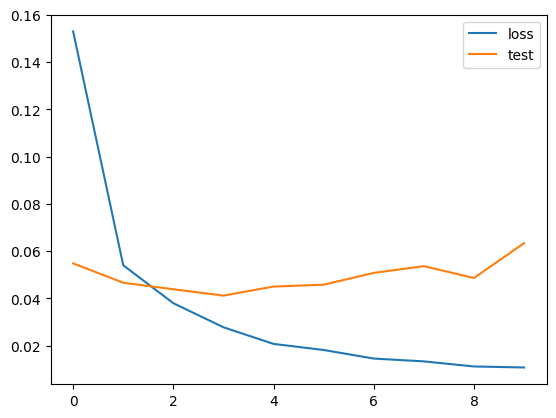

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'test')
plt.legend()

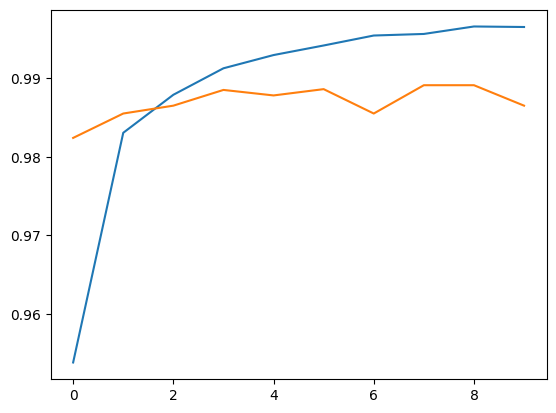

In [ ]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'vacc')